<a href="https://colab.research.google.com/github/nil-pc/Pattern-Recognition---Assignment/blob/master/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn import metrics
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn import datasets, linear_model

In [0]:
data=pd.read_csv('bank-additional-full.csv',sep=';')
data=data.dropna()
print(data.shape)
print(list(data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [0]:
dat=pd.read_csv('bank-additional.csv',sep=';')
dat=dat.dropna()
print(dat.shape)
print(list(dat.columns))

(4119, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [0]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [0]:
data['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [0]:
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

In [0]:
data['education'].unique()

array(['Basic', 'high.school', 'professional.course', 'unknown',
       'university.degree', 'illiterate'], dtype=object)

In [0]:
data=pd.get_dummies(data,prefix=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome'],columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome'])
data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


In [0]:
print(list(data.columns))

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 'education_Basic', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'default_no', 'default_unknown', 'default_yes', 'housing_no', 'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure', 'poutco

In [0]:
data.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

Class 0: 36548
Class 1: 4640
Proportion: 7.88 : 1


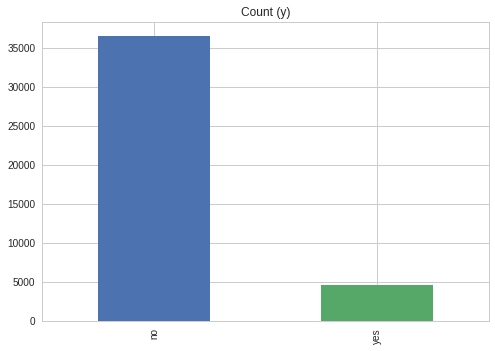

In [0]:
y_count = data.y.value_counts()
print('Class 0:', y_count[0])
print('Class 1:', y_count[1])
print('Proportion:', round(y_count[0] / y_count[1], 2), ': 1')

y_count.plot(kind='bar', title='Count (y)');

In [0]:
# Class count
count_class_0, count_class_1 = data.y.value_counts()

# Divide by class
data_class_0 = data[data['y'] == 'no']
data_class_1 = data[data['y'] == 'yes']

Random over-sampling:
no     36548
yes    36548
Name: y, dtype: int64


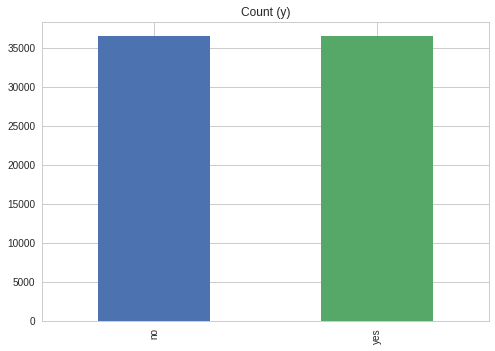

In [0]:
data_class_1_over = data_class_1.sample(count_class_0,replace=True)
data = pd.concat([data_class_0, data_class_1_over], axis=0)

print('Random over-sampling:')
print(data.y.value_counts())

data.y.value_counts().plot(kind='bar', title='Count (y)');

Class 0: 36548
Class 1: 36548
Proportion: 1.0 : 1


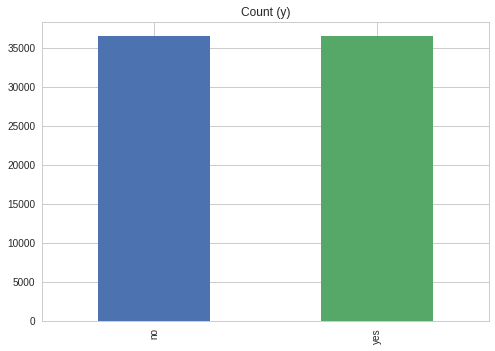

In [0]:
y_count = data.y.value_counts()
print('Class 0:', y_count[0])
print('Class 1:', y_count[1])
print('Proportion:', round(y_count[0] / y_count[1], 2), ': 1')

y_count.plot(kind='bar', title='Count (y)');

In [0]:
data['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,   8,   9,  11,   2,  10,  12,
         7,  13,  14,  15,  16,  17,  22,  18,  19,  20,  21,  27,  26,
        25])

In [0]:
data['pdays']=np.where(data['pdays'] ==999, -1, data['pdays'])

In [0]:
data['pdays'].unique()

array([-1,  6,  4,  3,  5,  1,  0,  8,  9, 11,  2, 10, 12,  7, 13, 14, 15,
       16, 17, 22, 18, 19, 20, 21, 27, 26, 25])

In [0]:
data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,-1,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,-1,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,-1,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,-1,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,-1,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


In [0]:
data['y']=np.where(data['y'] =='yes', 1, data['y'])
data['y']=np.where(data['y'] =='no', 0, data['y'])


In [0]:
#col_to_use=['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 'education_Basic', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'default_no', 'default_unknown', 'default_yes', 'housing_no', 'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success']
col_to_use = ['previous','euribor3m','job_blue-collar','job_management', 'job_retired','marital_single','education_high.school', 'education_unknown', 'default_no','housing_yes',
              'loan_unknown','contact_telephone', 'month_apr', 'month_aug','month_jun', 'month_mar', 'month_may','poutcome_success', 'poutcome_failure']

X=data[col_to_use]
y=data.y

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(data)

scaled_data = scaler.transform(data)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int64, float64, object were all converted to float64 by StandardScaler.
  import sys


In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(scaled_data)


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [0]:
x_pca = pca.transform(scaled_data)

scaled_data.shape



(73096, 62)

In [0]:
x_pca.shape

(73096, 2)

In [0]:
pca.components_

array([[ 0.01304044, -0.00397882, -0.089092  ,  0.21510439,  0.26420525,
        -0.34094242, -0.21839576,  0.03602109, -0.34977949, -0.34277315,
         0.21052207,  0.04725379, -0.11143319, -0.02440858, -0.00607852,
         0.0090333 ,  0.06509099, -0.00659683, -0.0335603 ,  0.083574  ,
         0.0047938 ,  0.01609244, -0.00729417, -0.00325568, -0.06826715,
         0.07468969,  0.00308567, -0.08923223,  0.0016408 ,  0.0033173 ,
         0.00876801,  0.06786805,  0.02104808,  0.16528941, -0.16528546,
        -0.00121599, -0.03439683, -0.00048982,  0.0344139 ,  0.00277269,
        -0.00048982, -0.00273273,  0.2309207 , -0.2309207 ,  0.0795666 ,
         0.0049127 ,  0.05641342, -0.08645472, -0.07900607,  0.07279267,
        -0.0728099 ,  0.03822009,  0.09182324,  0.10223927, -0.00871479,
        -0.01212853,  0.01965125,  0.00868798, -0.00845792,  0.1517264 ,
        -0.28537424,  0.22774508],
       [ 0.34140566, -0.00516078, -0.02471466,  0.15536123,  0.18287813,
        -0.03971

In [0]:
correlation = data.corr()
correlation

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
age,1.000000,-0.016068,-0.005928,0.033881,6.206902e-02,-0.052673,-0.016862,0.134382,-0.050340,-0.080343,...,0.053208,0.031293,-0.011036,0.017291,-0.015059,0.018462,-0.009206,0.008482,-0.056198,0.067095
duration,-0.016068,1.000000,-0.028720,-0.005052,-3.773087e-02,0.061868,0.054292,-0.055341,0.046748,0.048548,...,-0.024925,-0.013896,0.005911,-0.027768,0.021804,-0.010820,0.009976,-0.032298,0.041833,-0.022930
campaign,-0.005928,-0.028720,1.000000,-0.074222,-9.925193e-02,0.193010,0.131804,-0.028050,0.181628,0.183364,...,-0.072355,-0.050519,0.031483,0.027426,-0.010406,-0.021222,-0.025946,-0.062287,0.111643,-0.086052
pdays,0.033881,-0.005052,-0.074222,1.000000,5.988504e-01,-0.276952,0.007507,0.118066,-0.340073,-0.425170,...,0.103439,0.150221,-0.016926,-0.017730,0.017242,0.017461,-0.001170,0.007696,-0.586760,0.784598
previous,0.062069,-0.037731,-0.099252,0.598850,1.000000e+00,-0.380938,-0.052769,0.071101,-0.449667,-0.525475,...,0.116975,0.167671,-0.013198,-0.024422,0.017543,0.014791,0.004158,0.479856,-0.846602,0.644720
emp.var.rate,-0.052673,0.061868,0.193010,-0.276952,-3.809382e-01,1.000000,0.718449,-0.066012,0.958438,0.868713,...,-0.214817,-0.166956,-0.001786,0.008785,-0.023222,-0.016504,0.033525,-0.294205,0.461089,-0.316975
cons.price.idx,-0.016862,0.054292,0.131804,0.007507,-5.276859e-02,0.718449,1.000000,-0.163761,0.568808,0.347167,...,-0.075067,-0.020280,-0.006237,0.009058,-0.011667,-0.015956,0.025129,-0.209465,0.181844,-0.027870
cons.conf.idx,0.134382,-0.055341,-0.028050,0.118066,7.110110e-02,-0.066012,-0.163761,1.000000,0.042013,-0.088052,...,0.187163,0.202804,0.006837,-0.048184,-0.025669,0.054425,0.013081,-0.045253,-0.066860,0.137361
euribor3m,-0.050340,0.046748,0.181628,-0.340073,-4.496668e-01,0.958438,0.568808,0.042013,1.000000,0.941089,...,-0.176548,-0.202032,0.004325,0.005193,-0.033085,-0.005999,0.030788,-0.298741,0.504945,-0.371501
nr.employed,-0.080343,0.048548,0.183364,-0.425170,-5.254747e-01,0.868713,0.347167,-0.088052,0.941089,1.000000,...,-0.263065,-0.306267,0.008266,0.016159,-0.024466,-0.018491,0.019677,-0.264498,0.538890,-0.452954


In [0]:
eig_vals, eig_vecs = np.linalg.eig(correlation)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-1.17020884e-02  3.39909087e-01  2.32312214e-01 ... -3.72581836e-15
   1.56829632e-16 -5.09843799e-17]
 [ 2.40725403e-02 -8.86997995e-03  1.36105676e-02 ...  7.11307974e-15
   1.02383240e-16 -3.30261558e-17]
 [ 9.00926034e-02 -2.52608226e-02 -2.49425868e-02 ...  1.71179254e-14
  -1.02454597e-17  2.81279399e-17]
 ...
 [-1.61302762e-01  8.57584071e-02 -1.90923025e-02 ... -5.27942316e-02
   1.12146701e-04 -8.21939975e-05]
 [ 2.94992937e-01 -1.89212768e-01  1.93863234e-01 ... -6.85960368e-02
   1.45713253e-04 -1.06795426e-04]
 [-2.30782166e-01  1.66432220e-01 -2.42022359e-01 ... -5.07816144e-02
   1.07871454e-04 -7.90606049e-05]]

Eigenvalues 
[ 5.99180643e+00  2.90332034e+00  2.47547209e+00  2.32309724e+00
  2.21776559e+00  1.98573227e+00  1.89575309e+00  6.05847196e-03
  2.84131854e-03  1.60271550e-01  1.79355845e+00  2.59347364e-01
  2.70077862e-01  3.26871080e-01  3.71952852e-01  1.72889403e+00
  1.66125749e+00  1.63552805e+00  4.63548374e-01  1.55230116e+00
  1.4797012

In [0]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)



In [0]:
total= sum(eig_vals)
var_exp = [(i / total)*100 for i in sorted(eig_vals, reverse=True)]
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])
   


NameError: ignored

In [0]:
count=0
sum=0
for i in var_exp:
  if(sum<=80):
    count=count+1
    sum=sum+i
print ("number of dimensions required to capture 80% of variance is "+str(count)) 

NameError: ignored

In [0]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(20, 10))

    plt.bar(range(61), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
   # plt.ylabel('Explained variance ratio')
   # plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()


NameError: ignored

In [0]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)


In [0]:
var_exp

In [0]:

from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,61,1)
